In [14]:
import pandas as pd
import scipy.stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# Data from the tables
# The format is a dictionary of dictionaries where the outer key is the dataset ID,
# and the inner key is the number of demos, and the value is a list of results for each method
data_llava = pd.DataFrame({
    1: {1: [.50, .85, .65], 2: [.53, .89, .61], 4: [.55, .88, .55]},
    2: {1: [.39, .48, .25], 2: [.46, .56, .32], 4: [.50, .66, .50]},
    3: {1: [.54, .61, .60], 2: [.58, .61, .61]},
    4: {1: [.33, .38, .20], 2: [.36, .49, .19], 4: [.38, .51, .38]},
    5: {1: [.46, .57, .51], 2: [.51, .62, .54], 4: [.54, .63, .54]},
    6: {1: [.29, .46, .28], 2: [.37, .65, .30], 4: [.43, .70, .43]},
    8: {1: [.44, .48, .53], 2: [.50, .60, .55], 4: [.54, .63, .56]},
    9: {1: [.33, .53, .30], 2: [.38, .60, .30], 4: [.43, .62, .38]},
    10: {1: [.39, .63, .45], 2: [.47, .72, .50], 4: [.52, .72, .55]},
    11: {1: [.41, .60, .38], 2: [.46, .69, .42], 4: [.51, .68, .49]}
})

data_clip = pd.DataFrame({
    1: {1: [25.10, 29.33, 25.92], 2: [25.47, 30.03, 25.64], 4: [25.70, 29.98, 25.70]},
    2: {1: [23.41, 24.54, 21.52], 2: [23.81, 25.72, 21.88], 4: [24.14, 26.81, 24.14]},
    3: {1: [26.34, 26.24, 25.87], 2: [27.00, 26.87, 25.62]},
    4: {1: [19.52, 21.51, 19.27], 2: [19.95, 24.25, 19.23], 4: [20.25, 24.86, 20.25]},
    5: {1: [24.98, 27.48, 25.66], 2: [25.76, 28.24, 26.10], 4: [26.40, 28.35, 26.40]},
    6: {1: [21.11, 25.48, 21.99], 2: [22.91, 28.30, 22.07], 4: [23.89, 29.06, 23.89]},
    8: {1: [22.83, 23.62, 23.53], 2: [23.63, 24.80, 23.65], 4: [24.00, 24.39, 23.91]},
    9: {1: [20.98, 24.06, 21.27], 2: [21.83, 24.95, 21.24], 4: [22.31, 24.82, 21.88]},
    10: {1: [20.73, 24.88, 21.44], 2: [22.36, 26.12, 22.34], 4: [23.36, 25.91, 23.30]},
    11: {1: [21.28, 24.42, None], 2: [22.83, 25.46, None], 4: [None, 24.59, None]}
})

In [49]:
def flatten(data):
    data = data.values.flatten()
    results = []
    for row in data:
        if not isinstance(row, list):
            results.extend([np.nan, np.nan, np.nan])
            continue
        for col in row: 
            if col is None:
                results.append(np.nan)
            else:
                results.append(col)
    return np.array(results)

In [50]:
vec_llava = flatten(data_llava)
vec_clip = flatten(data_clip)

nan_llava = np.where(np.isnan(vec_llava))[0]
nan_clip = np.where(np.isnan(vec_clip))[0]
nan_idx = np.union1d(nan_llava, nan_clip)

vec_llava = np.delete(vec_llava, nan_idx)
vec_clip = np.delete(vec_clip, nan_idx)

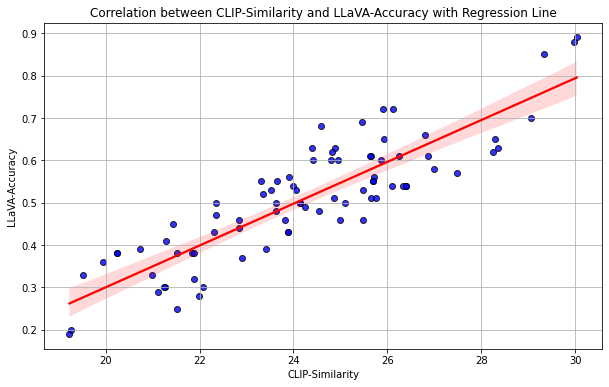

In [52]:
# Plot with a regression line and confidence interval
plt.figure(figsize=(10, 6))
sns.regplot(x=vec_clip, y=vec_llava, ci=95, color="blue", line_kws={'color': 'red'}, scatter_kws={'color': 'blue', 'edgecolor': 'k'})

plt.title('Correlation between CLIP-Similarity and LLaVA-Accuracy with Regression Line')
plt.xlabel('CLIP-Similarity')
plt.ylabel('LLaVA-Accuracy')
plt.grid(True)
plt.show()

In [54]:
# Computing the Pearson correlation coefficient
pearson_corr, p_value = scipy.stats.pearsonr(vec_llava, vec_clip)
print("Pearson correlation coefficient: ", pearson_corr)

Pearson correlation coefficient:  0.8721334752721673
